In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 线性回归
## 模拟数据生成

In [159]:
def gen_sample_data(size: int=100):
    w = random.randint(2, 10) + random.random()
    b = random.randint(0, 5) + random.random()
    print('w:{}, b:{}'.format(w, b))
    
    def map_fun(x):
        # 计算出准确值之后加入噪声
        return w * x + b + random.randint(-10, 100)
    
    x = np.random.randint(0, 100, 100)
    y = np.vectorize(map_fun)(x)
    return x, y

w:2.4590829858227576, b:0.04563517835523645


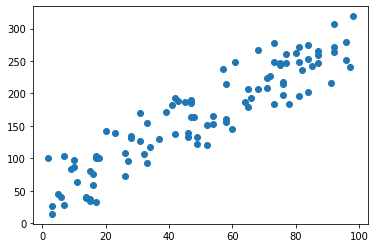

In [168]:
x_list, y_list = gen_sample_data()
plt.scatter(x_list, y_list)
plt.show()

## 1. 模型假设: y = w*x + b
## 2. 期望函数/损失函数/目标函数 loss = 0.5((y_label - (w*x + b)) ^ 2
    乘以0.5是为了在对loss求导的时候，约掉
## 3. 梯度函数

## 模型函数

In [147]:
def inference(w, b, x):
    return w * x + b

##  损失函数

In [148]:
def loss_function(w, b, x_list: np.ndarray, ground_truth_list: np.ndarray):
    '''
    ground_truth_list: 标签
    '''    
    avg_loss = 0
    
    def infer(x):
        return inference(w, b, x)
        
    pre_y = np.vectorize(infer)(x_list)
    total_loss = 0.5*(pre_y - ground_truth_list)**2
    return total_loss.mean()
loss_function(3, 4, x_list, y_list)

4885.619016490078

## 梯度计算

In [149]:
def gradient(x, gt_y, pred_y):
    diff = gt_y - pred_y
    diff_w = diff * x  # loss函数对w求导
    diff_b = diff  # loss函数对b求导
    return diff_w, diff_b

### batch size个数据样本带来的梯度

In [150]:
def cal_step_gradient(x_list, gt_y_list, w, b, lr):
    pre_y_list = np.vectorize(inference)(w, b, x_list)
    dw_total, db_total = np.vectorize(gradient)(x_list, gt_y_list, pre_y_list)
    return w + dw_total.mean() * lr, b + db_total.mean() * lr

In [205]:
def train(x_list: np.ndarray, gt_y_list: np.ndarray, batch_size, lr=0.001, max_iterations=100):
    '''
    x_list: 
    gt_y_list:
    batch_size:
    lr: 学习率 learning rate
    max_iterations: 最大迭代次数
    '''
    w, b = 0, 0
    size = x_list.size
    draw_step = max_iterations // 10
    for i in range(max_iterations):
        batch_ids = np.random.choice(size, batch_size)
        batch_x = x_list[batch_ids]
        batch_y = gt_y_list[batch_ids]
        w, b = cal_step_gradient(batch_x, batch_y, w, b, lr)
        loss = loss_function(w, b, batch_x, batch_y)
#         print('w: {}, b:{}, loss:{}'.format(w, b, loss))
        if i % draw_step == 0:
            # draw the line
            plt.scatter(x_list, gt_y_list)
            x_dot = np.linspace(0, 100, 50)
            y_dot = w * x_dot + b
            label = 'iteration:{}'.format(i + 1)
            plt.plot(x_dot, y_dot, color='red', linestyle='--', label=label)
            plt.legend()
            plt.show()
    return w, b

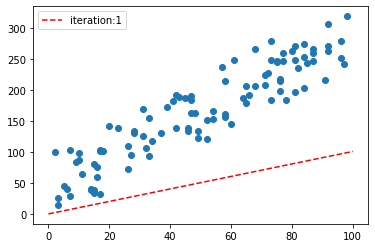

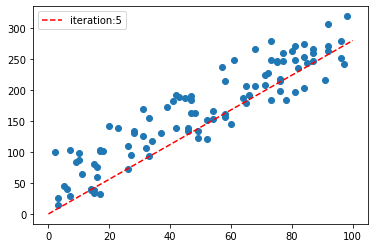

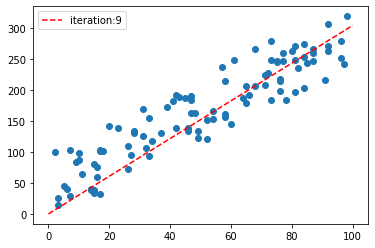

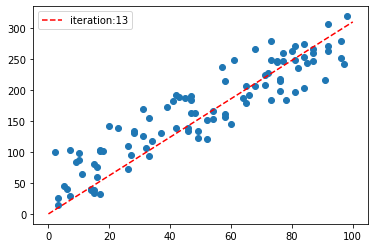

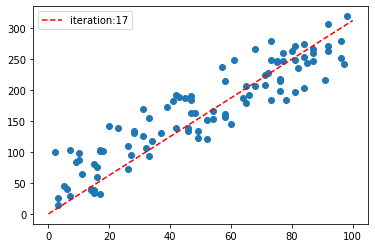

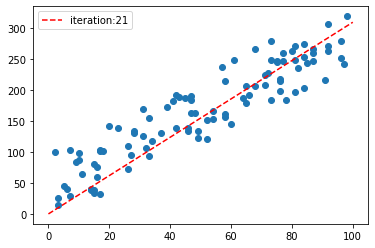

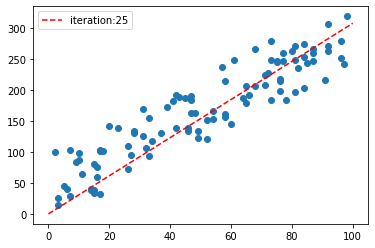

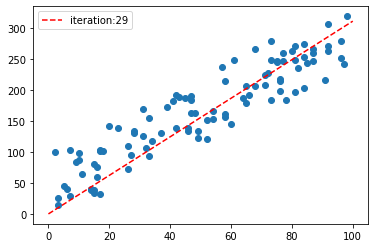

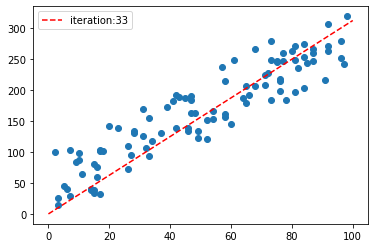

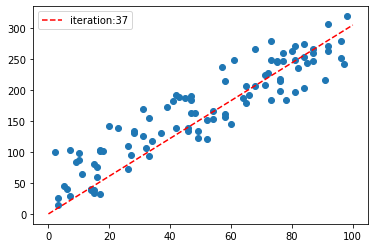

In [207]:
w, b = train(x_list, y_list, 32, 0.0001, 40)
x_dot = np.linspace(0, 100, 50)
y_dot = w * x_dot + b
# plt.scatter(x_list, y_list)
# plt.plot(x_dot, y_dot)
# batch_ids = np.random.choice(100, 80)
# print(batch_ids.dtype)
# print('xlist', x_list, len(x_list), type(x_list))
# print(x_list[batch_ids])
# np.choose(batch_ids, x_list)
# batch_y = np.choose(batch_ids, gt_y_list)